In [3]:
import os
import sys

import random
import seaborn as sns
import cv2
# General packages
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import PIL

import nilearn as nl
import nilearn.plotting as nlplt
import nibabel as nib
import h5py
import plotly.graph_objs as go
from IPython.display import Image, display
import joypy
import warnings

sys.path.insert(0, 'D:/Downloads/Trends_neuroimaging/Data')

In [5]:
# image and mask directories
BASE_PATH = f'Data/'
train_data_dir = f'{BASE_PATH}/fMRI_train'
test_data_dir = f'{BASE_PATH}/fMRI_test'

print('Reading data...')
loading_data = pd.read_csv(f'{BASE_PATH}/loading.csv')
train_data = pd.read_csv(f'{BASE_PATH}/train_scores.csv')
sample_submission = pd.read_csv(f'{BASE_PATH}/sample_submission.csv')
print('Reading data completed')

Reading data...
Reading data completed


In [6]:
os.getcwd()

'D:\\Downloads\\Trends_neuroimaging'

In [11]:
display(train_data.head())
print("Shape of train_data :", train_data.shape)

,Id,age,domain1_var1,domain1_var2,domain2_var1,domain2_var2
0,10001,57.436077,30.571975,62.553736,53.325130,51.427998
1,10002,59.580851,50.969456,67.470628,60.651856,58.311361
2,10004,71.413018,53.152498,58.012103,52.418389,62.536641
3,10005,66.532630,NaN,NaN,52.108977,69.993075
4,10007,38.617381,49.197021,65.674285,40.151376,34.096421


Shape of train_data : (5877, 6)


In [17]:
display(loading_data.head())
## This should be the gray matter concentration for each subject in each voxel region (this is for both train and test)
print("Shape of loading_data :", loading_data.shape)

,Id,IC_01,IC_07,IC_05,IC_16,IC_26,IC_06,IC_10,IC_09,IC_18,...,IC_08,IC_03,IC_21,IC_28,IC_11,IC_20,IC_30,IC_22,IC_29,IC_14
0,10001,0.006070,0.014466,0.004136,0.000658,-0.002742,0.005033,0.016720,0.003484,0.001797,...,0.018246,0.023711,0.009177,-0.013929,0.030696,0.010496,0.002892,-0.023235,0.022177,0.017192
1,10002,0.009087,0.009291,0.007049,-0.002076,-0.002227,0.004605,0.012277,0.002946,0.004086,...,0.014635,0.022556,0.012004,-0.011814,0.022479,0.005739,0.002880,-0.016609,0.025543,0.014524
2,10003,0.008151,0.014684,0.010444,-0.005293,-0.002913,0.015042,0.017745,0.003930,-0.008021,...,0.019565,0.030616,0.018184,-0.010469,0.029799,0.015435,0.005211,-0.028882,0.031427,0.018164
3,10004,0.004675,0.000957,0.006154,-0.000429,-0.001222,0.011755,0.013010,0.000193,0.008075,...,0.002658,0.022266,0.005956,-0.010595,0.024078,-0.000319,0.005866,-0.015182,0.024476,0.014760
4,10005,-0.000398,0.006878,0.009051,0.000369,0.000336,0.010679,0.010352,0.003637,0.004180,...,0.009702,0.017257,0.005454,-0.008591,0.019416,0.000786,0.002692,-0.019814,0.017105,0.013316


Shape of loading_data : (11754, 27)


In [13]:
# checking missing data
total = train_data.isnull().sum().sort_values(ascending = False)
percent = (train_data.isnull().sum()/train_data.isnull().count()*100).sort_values(ascending = False)
missing_train_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_train_data.head()

,Total,Percent
domain1_var2,438,7.452782
domain1_var1,438,7.452782
domain2_var2,39,0.663604
domain2_var1,39,0.663604
age,0,0.000000


In [19]:
## No missing data in loading (SBM gray matter concentration)
total = loading_data.isnull().sum().sort_values(ascending = False)
percent = (loading_data.isnull().sum()/loading_data.isnull().count()*100).sort_values(ascending = False)
missing_loading_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_loading_data.head()

,Total,Percent
IC_14,0,0.0
IC_24,0,0.0
IC_01,0,0.0
IC_07,0,0.0
IC_05,0,0.0


In [20]:
def plot_bar(df, feature, title='', show_percent = False, size=2):
    f, ax = plt.subplots(1,1, figsize=(4*size,3*size))
    total = float(len(df))
    sns.barplot(np.round(df[feature].value_counts().index).astype(int), df[feature].value_counts().values, alpha=0.8, palette='Set2')

    plt.title(title)
    if show_percent:
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x()+p.get_width()/2.,
                    height + 3,
                    '{:1.2f}%'.format(100*height/total),
                    ha="center", rotation=45) 
    plt.xlabel(feature, fontsize=12, )
    plt.ylabel('Number of Occurrences', fontsize=12)
    plt.xticks(rotation=90)
    plt.show()

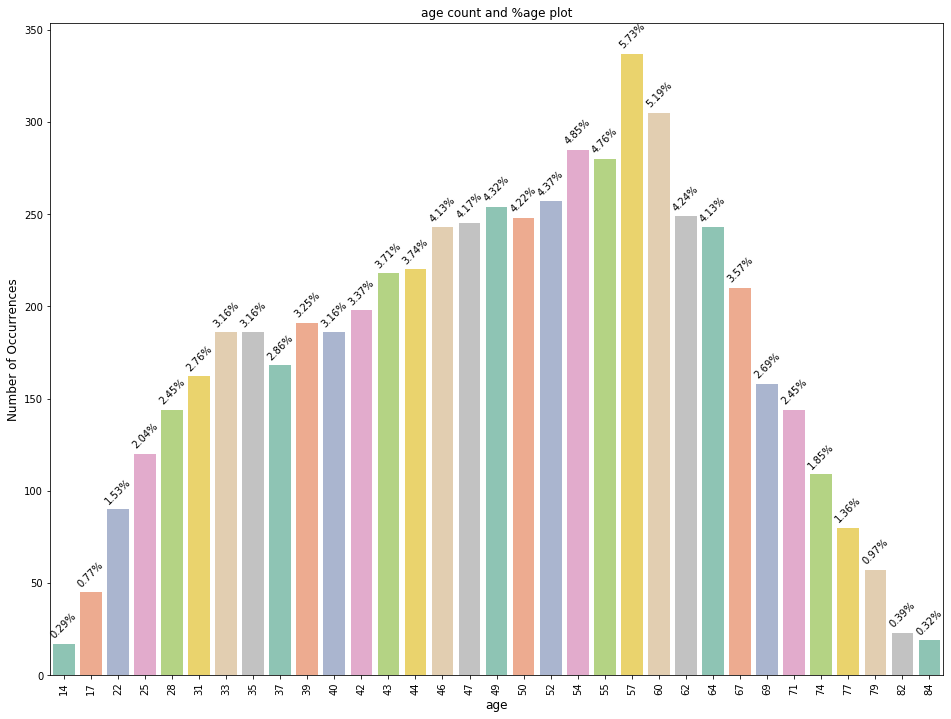

In [21]:
plot_bar(train_data, 'age', 'age count and %age plot', show_percent=True, size=4)

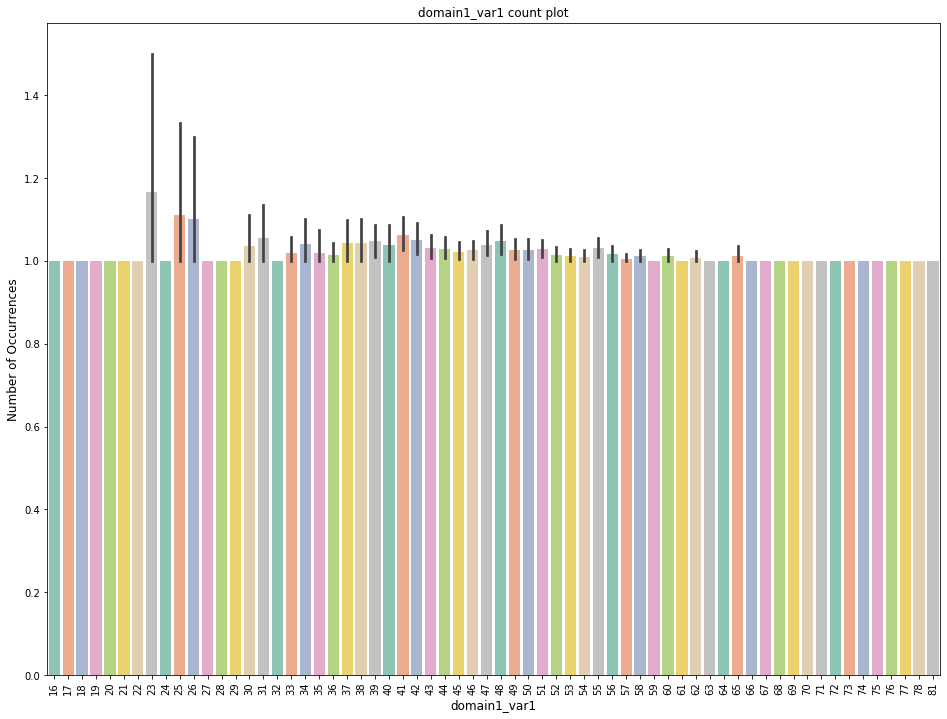

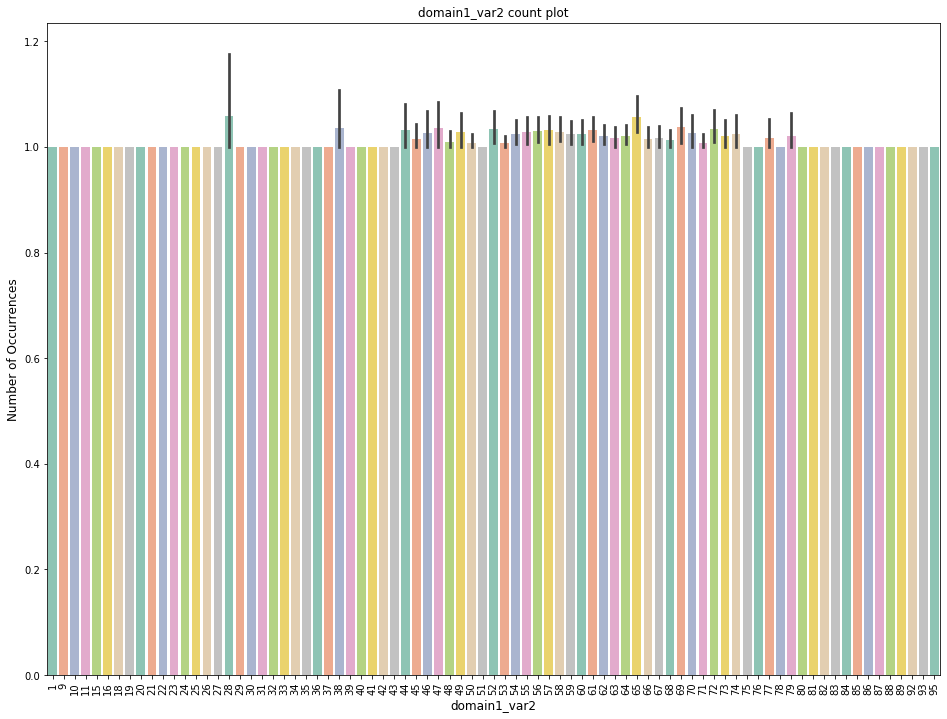

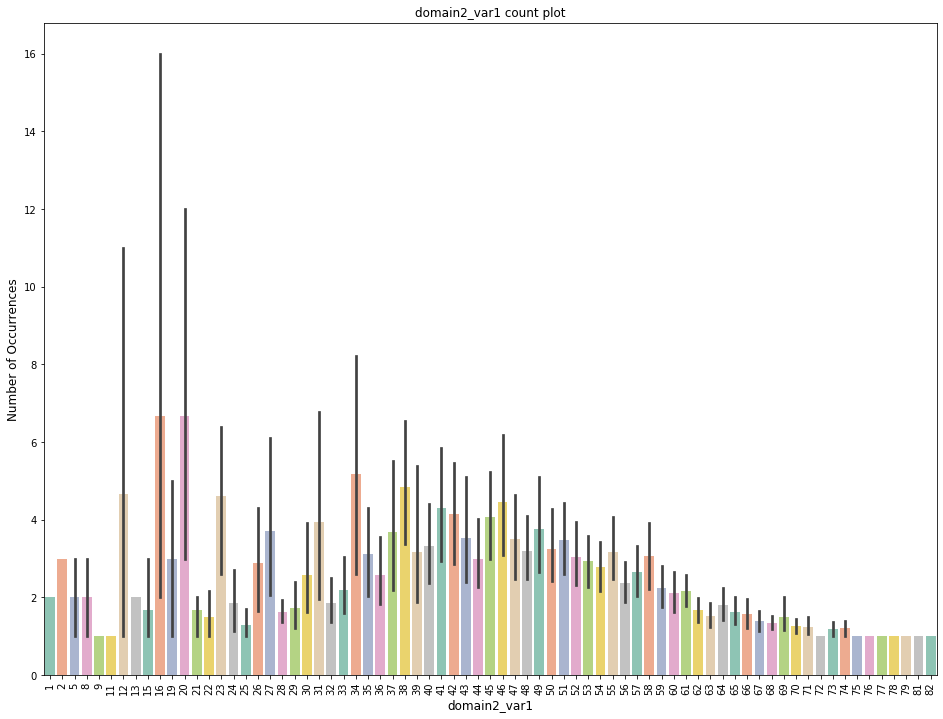

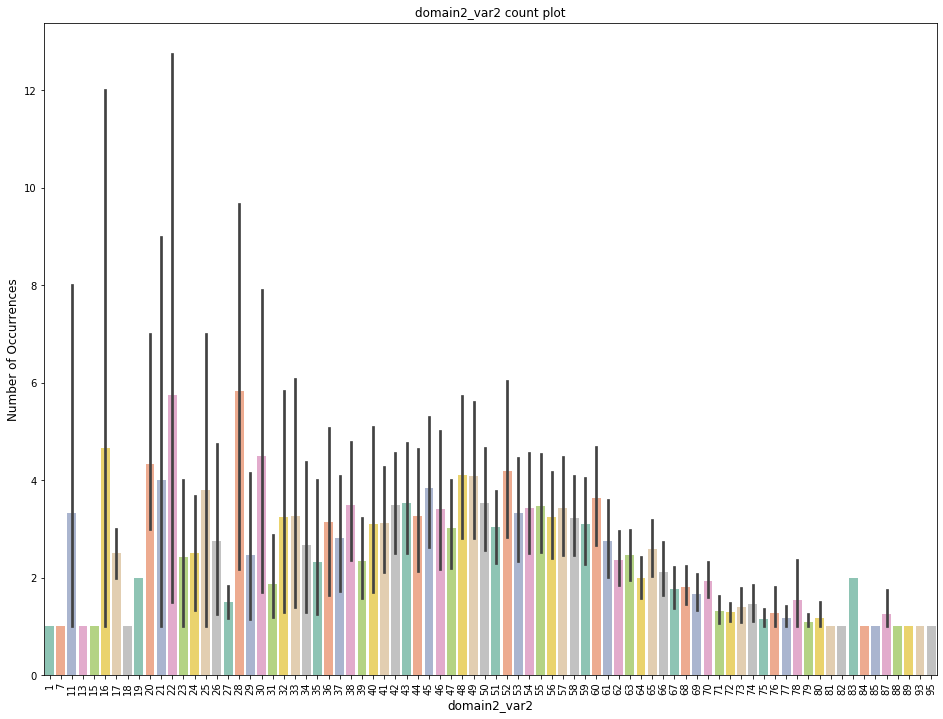

In [22]:
for col in train_data.columns[2:]:
    plot_bar(train_data, col, f'{col} count plot', size=4)

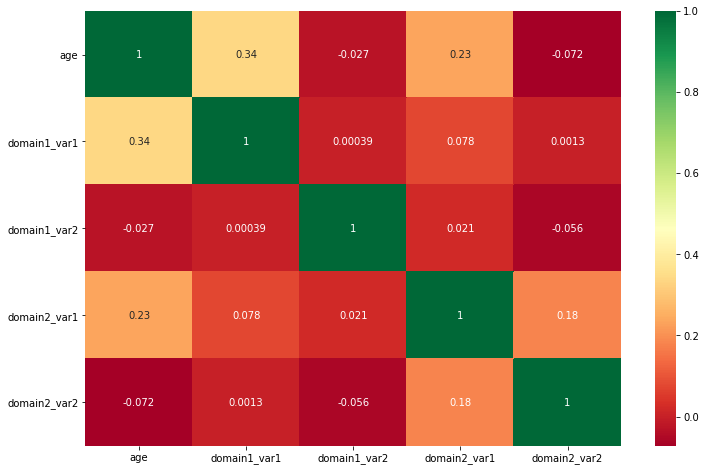

In [23]:
temp_data =  train_data.drop(['Id'], axis=1)

plt.figure(figsize = (12, 8))
sns.heatmap(temp_data.corr(), annot = True, cmap="RdYlGn")
plt.yticks(rotation=0) 

plt.show()

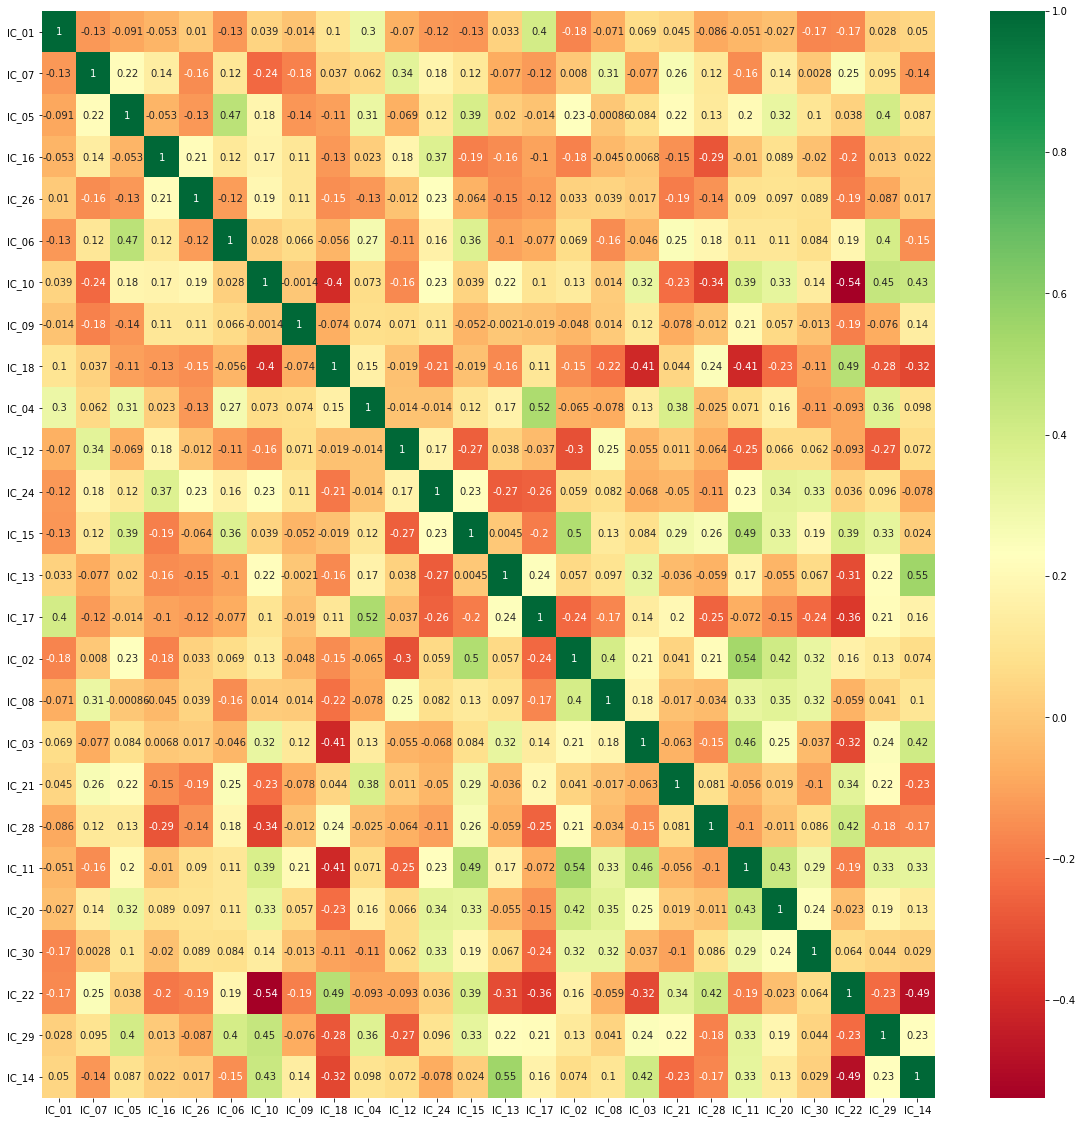

In [24]:
temp_data =  loading_data.drop(['Id'], axis=1)

plt.figure(figsize = (20, 20))
sns.heatmap(temp_data.corr(), annot = True, cmap="RdYlGn")
plt.yticks(rotation=0) 

plt.show()

In [25]:
temp_data =  loading_data.drop(['Id'], axis=1)
# Create correlation matrix
correl = temp_data.corr().abs()

# Select upper triangle of correlation matrix
upper = correl.where(np.triu(np.ones(correl.shape), k=1).astype(np.bool))
# Find index of feature columns with correlation greater than 0.5
to_drop = [column for column in upper.columns if any(upper[column] > 0.5)]

print('Very high correlated features: ', to_drop)

Very high correlated features:  ['IC_17', 'IC_02', 'IC_11', 'IC_22', 'IC_14']


In [91]:
mask_file = f'{BASE_PATH}/fMRI_mask.nii'
subject_file = f'{train_data_dir}/10001.mat'
bg_nii = f'{BASE_PATH}/template/ch2better.nii'
mask_niimg = nl.image.load_img(mask_file)

def load_subject(filepath, mask_img):
    ## r = read only
    subject_data = None
    with h5py.File(filepath, 'r') as f:
        subject_data = f.get('SM_feature')
        subject_data = np.array(subject_data)
        ## 3 cuts, 53 images of frontal, axial and lateral cuts
        subject_data = np.moveaxis(subject_data, [0,1,2,3], [3,2,1,0])
        subject_image = nl.image.new_img_like(mask_niimg, subject_data, affine=mask_niimg.affine, copy_header=True)
        return subject_image

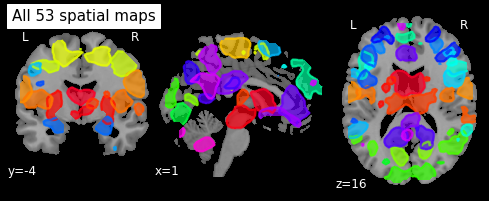

In [94]:
subject_niimg = load_subject(subject_file, mask_niimg)
num_components = subject_niimg.shape[-1]
## Probabilitic view onto anatomical image with default nii
nlplt.plot_prob_atlas(subject_niimg, bg_img=bg_nii, view_type='filled_contours', draw_cross=False, title='All %d spatial maps' % num_components, threshold='auto')

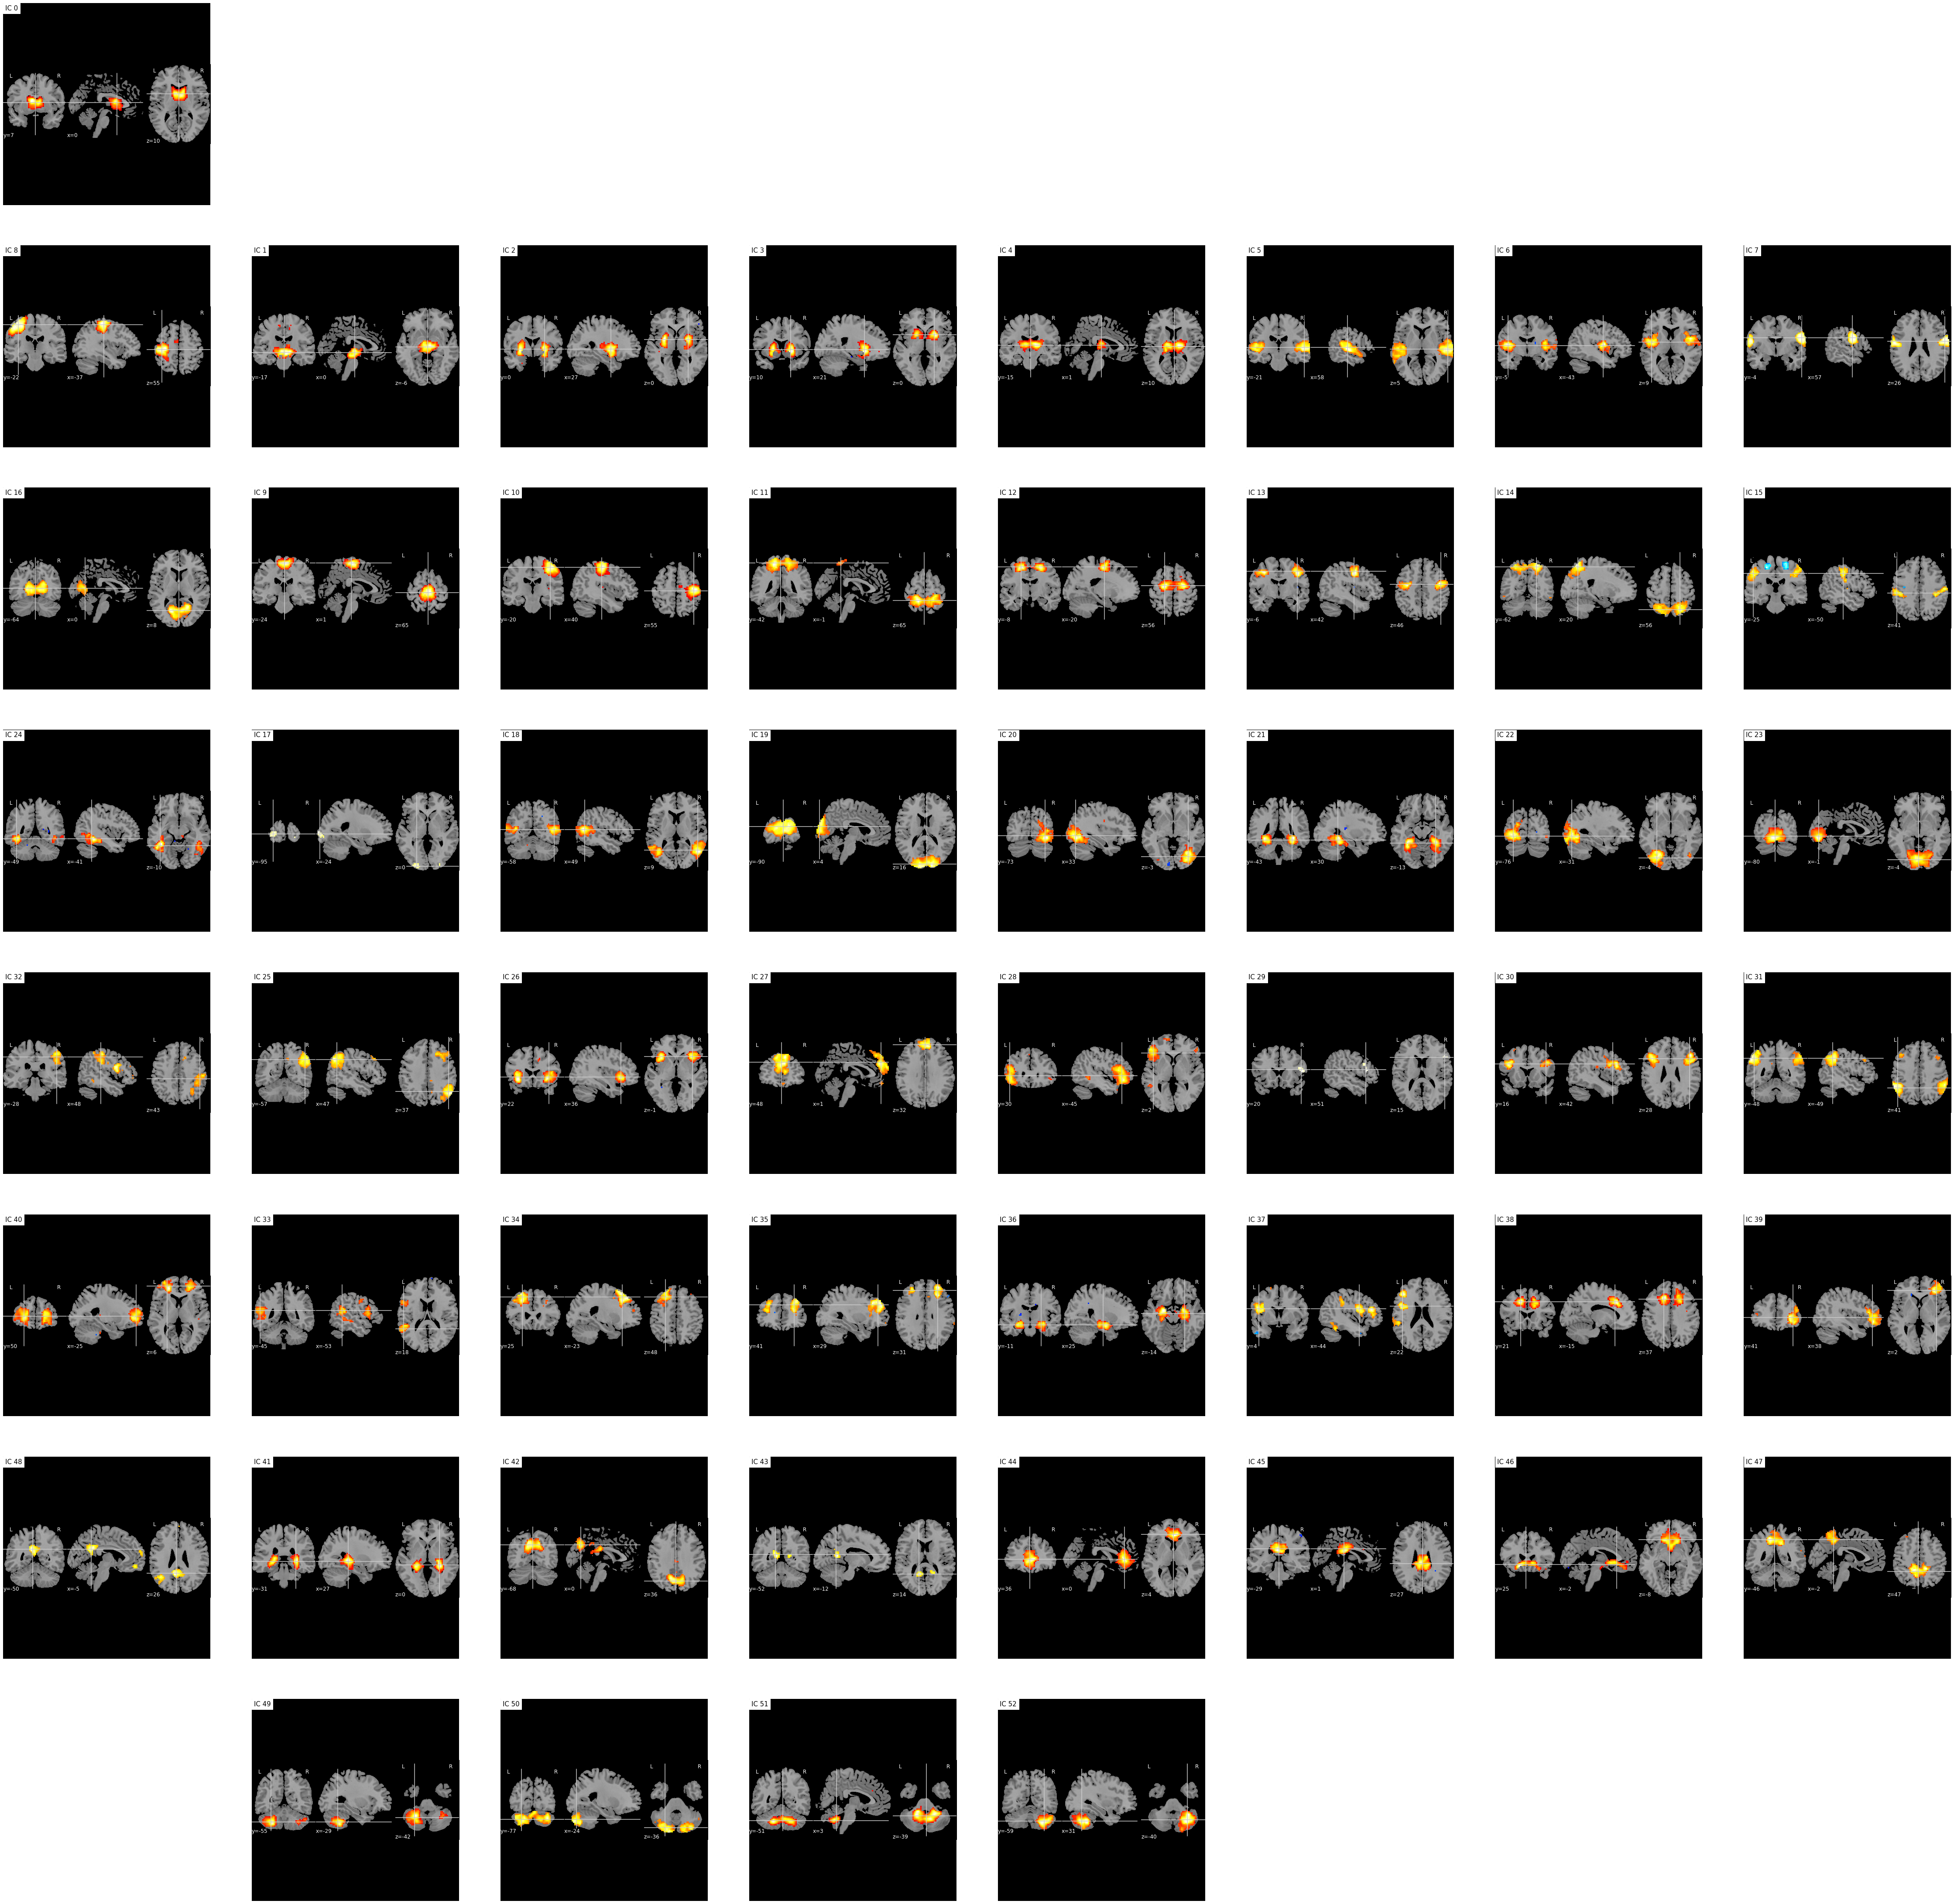

In [101]:
grid_size = int(np.ceil(np.sqrt(num_components)))
fig, axes = plt.subplots(grid_size, grid_size, figsize=(grid_size*10, grid_size*10))
[axi.set_axis_off() for axi in axes.ravel()]

row = 0
## i is index and current_image is the current image in the iterator
for i, current_image in enumerate(nl.image.iter_img(subject_niimg)):
    ## plot stat is for 3D data (individual plots)
    col = i % grid_size
    nlplt.plot_stat_map(current_image, bg_img=bg_nii, title="IC %d" % i, axes=axes[row, col], threshold=3, colorbar=False)
    if col == 0:
        row += 1